          mu   mu_star     sigma  mu_star_conf
x1 -0.075249  2.549948  2.679855      0.051816
x2  0.053249  1.455806  1.646782      0.054886
x3 -0.000924  0.601521  0.701972      0.025575
x4 -0.010532  0.326635  0.382144      0.013114
x5 -0.001072  0.034240  0.040129      0.001345
x6 -0.000292  0.033531  0.039326      0.001376
x7 -0.000599  0.033752  0.039573      0.001194
x8  0.001075  0.033900  0.039458      0.001225


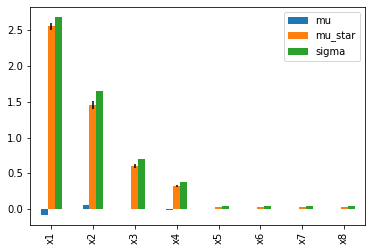

In [1]:
from SALib.test_functions import Sobol_G
from SALib.analyze import morris
from SALib.sample.morris import sample


# Specify problem context
problem = {
    'num_vars': 8,
    'names': ['x1', 'x2', 'x3', 'x4', 
              'x5', 'x6', 'x7', 'x8'],
    'groups': None,
    'bounds': [[0.0, 1.0],] * 8
}

# Generate samples
X = sample(problem, N=1000, num_levels=4)

# Evaluate the model
Y = Sobol_G.evaluate(X)

# Perform the sensitivity analysis using the model output
# Specify which column of the output file to analyze (zero-indexed)
Si = morris.analyze(problem, X, Y,
                    print_to_console=True,
                    num_levels=4, 
                    num_resamples=100)

# Display indicative plot
ax = Si.plot()

# Convert to DataFrame
Si_df = Si.to_df()

In [2]:
print(Si)

{'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'], 'mu': array([-0.07524901,  0.05324941, -0.00092391, -0.01053211, -0.00107215,
       -0.0002918 , -0.00059882,  0.00107539]), 'mu_star': masked_array(data=[2.5499482737184134, 1.4558059997048698,
                   0.6015212864604719, 0.3266346628299373,
                   0.03423991604386191, 0.033530993749790364,
                   0.033752354780962945, 0.033900374675733404],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=1e+20), 'sigma': array([2.67985512, 1.64678248, 0.70197182, 0.38214433, 0.04012856,
       0.03932643, 0.03957309, 0.03945848]), 'mu_star_conf': masked_array(data=[0.0518162824122177, 0.054885948748193226,
                   0.025575138887769838, 0.013114259062585856,
                   0.0013451602114003072, 0.0013759936183998663,
                   0.0011936040135721575, 0.0012249997559400855],
             mask=[False, False, False, False, False, False, Fals

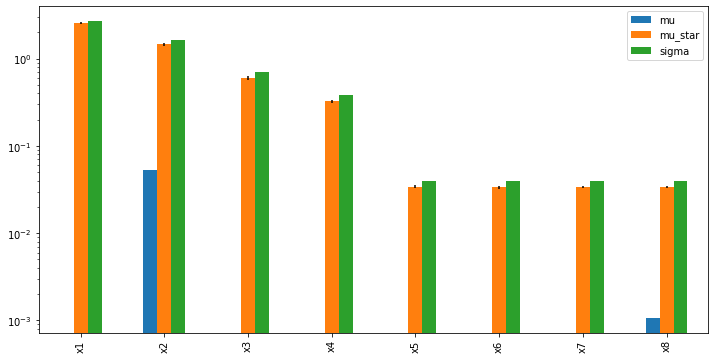

In [3]:
import matplotlib.pyplot as plt
from SALib.plotting.bar import plot as barplot


# Plot customization by manually specifying figure attributes
fig, ax1 = plt.subplots(1,1, figsize=(12,6))

ax1 = barplot(Si.to_df(), ax=ax1)

ax1.set_yscale('log')

Same as above, but without comments for publication

          mu   mu_star     sigma  mu_star_conf
x1 -0.105100  2.650752  2.777854      0.067829
x2 -0.065664  1.486701  1.676403      0.067722
x3 -0.058296  0.599013  0.690928      0.027321
x4  0.013006  0.353004  0.410667      0.019071
x5  0.000015  0.034815  0.040653      0.001873
x6  0.001894  0.033395  0.039157      0.001897
x7 -0.000216  0.036011  0.042148      0.001791
x8 -0.000791  0.034850  0.040861      0.002008


Text(0, 0.5, 'EE')

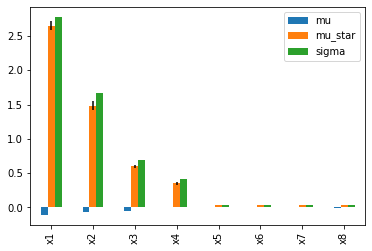

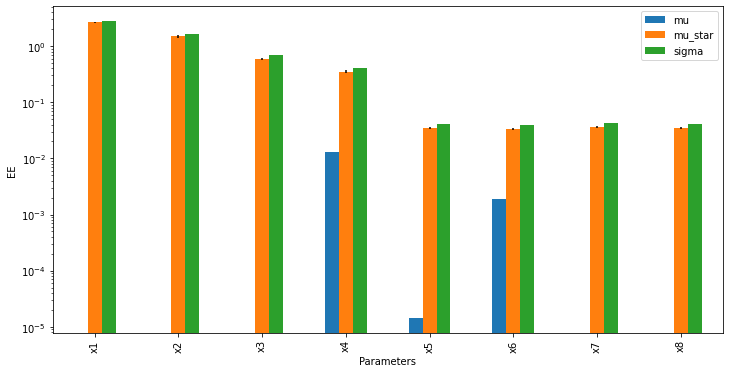

In [7]:
from SALib.test_functions import Sobol_G
from SALib.analyze import morris
from SALib.sample.morris import sample
import matplotlib.pyplot as plt
from SALib.plotting.bar import plot as barplot


problem = {
    'num_vars': 8,
    'names': ['x1', 'x2', 'x3', 'x4', 
              'x5', 'x6', 'x7', 'x8'],
    'groups': None,
    'bounds': [[0.0, 1.0],] * 8
}

X = sample(problem, N=512, num_levels=4)
Y = Sobol_G.evaluate(X)

Si = morris.analyze(problem, X, Y,
                    print_to_console=True,
                    num_levels=4, 
                    num_resamples=100)

Si.plot()
Si_df = Si.to_df()

fig, ax1 = plt.subplots(1,1, figsize=(12,6))
ax1 = barplot(Si.to_df(), ax=ax1)
ax1.set_yscale('log')
ax1.set_xlabel("Parameters")
ax1.set_ylabel("EE")